In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle as astropy_ls

import matplotlib 
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)




In [5]:
data = pd.read_csv('times_input.txt', sep='\t')

times = data['time'].values
times_err = data['time_err'].values
epochs = data['epoch'].values+1



In [6]:
from scipy import optimize

def get_times_model(epochs, T0, P, alpha_ttv, beta_ttv): 
    return T0 + P*epochs + alpha_ttv*np.sin((2*np.pi*epochs/ P_ttv)) +  beta_ttv*np.cos((2*np.pi*epochs/ P_ttv))

def get_times_null_model(epochs, T0, P): 
    return T0 + P*epochs

def get_chisq(times, times_model, times_err):
    chisq = 0
    for ii in range(0, len(times)):
        chisq += ( ((times_model[ii] - times[ii])**2) / (times_err[ii]**2) )
    

    return chisq

In [30]:
from scipy import optimize

def get_times_model2(epochs, T0, P, alpha1_ttv, beta1_ttv, alpha2_ttv, beta2_ttv): 
    linear = P*epochs
    wave1 = alpha1_ttv*np.sin((2*np.pi*epochs/ P1_ttv)) +  beta1_ttv*np.cos((2*np.pi*epochs/ P1_ttv))
    wave2 = alpha2_ttv*np.sin((2*np.pi*epochs/ P2_ttv)) +  beta2_ttv*np.cos((2*np.pi*epochs/ P2_ttv))
    
    return T0 + linear + wave1 + wave2
    

def get_times_null_model(epochs, T0, P): 
    return T0 + P*epochs

def get_chisq(times, times_model, times_err):
    chisq = 0
    for ii in range(0, len(times)):
        chisq += ( ((times_model[ii] - times[ii])**2) / (times_err[ii]**2) )
    
    #chisq = np.sum(((times_model-times)**2.) / times_err)

    return chisq

In [31]:
times_err2=[0.00039467, 0.00043677, 0.00046896, 0.00040072, 0.0004211 ,
       0.00036478, 0.00042056, 0.00036551, 0.0058933 ]


In [32]:
null_model,_  = optimize.curve_fit(get_times_null_model, epochs, times, sigma=times_err2, absolute_sigma = True)
times_null_model = get_times_null_model(epochs, *null_model)
null_chisq = get_chisq(times, times_null_model, times_err2)

period_grid = np.linspace(2, 100, 10000)

chisq_grid = []
for P1_ttv in period_grid:
    P2_ttv = 2.57
    a_model,_  = optimize.curve_fit(get_times_model2, epochs, times, sigma=times_err2, absolute_sigma = True)
    times_a_model = get_times_model2(epochs, *a_model)
    a_chisq = get_chisq(times, times_a_model, times_err2)
    delta_chisq = null_chisq - a_chisq

    chisq_grid.append(delta_chisq)
    
    
    
    
    

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


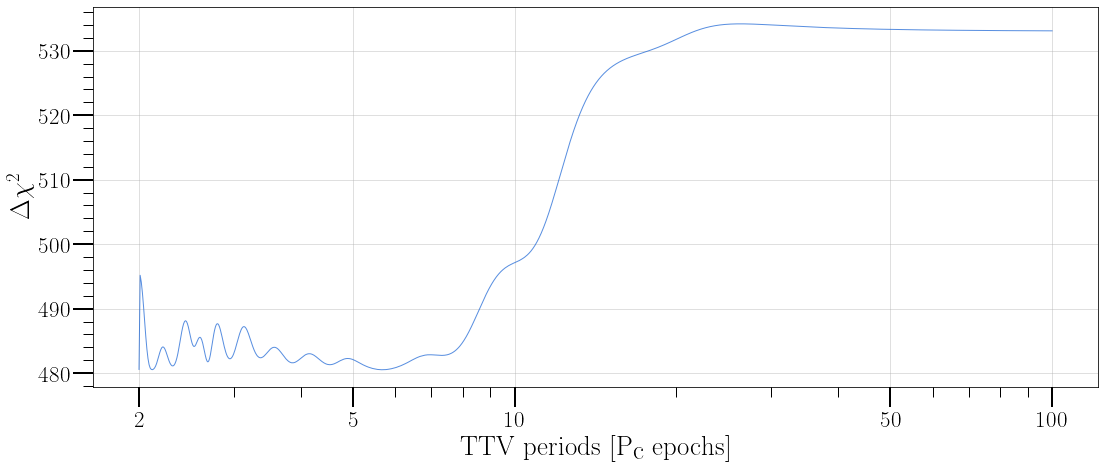

In [33]:
fig, ax = plt.subplots(1, figsize=[18, 7])


ax.plot(period_grid, chisq_grid, color="#125fd3", lw=1, label = 'Kepler + TESS/BARO/BARON', alpha=0.7)


ax.set_xlabel(r'TTV periods [P$_\textrm{c}$ epochs]', fontsize=27)
ax.set_ylabel(r'$\Delta \chi ^2$', fontsize=27)

ax.set_xscale('log')


ax.grid(visible=True, alpha=0.5)
ax.set_xticks([2, 5, 10, 50, 100])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())



# We change the length of ticks 
ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=10, width=1, which='minor')
ax.minorticks_on()

#ax.legend(loc=4, fontsize=23)




/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


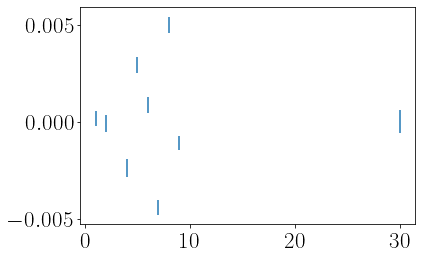

In [28]:
null_model,_  = optimize.curve_fit(get_times_null_model, epochs, times, sigma=times_err2, absolute_sigma = True)
times_null_model = get_times_null_model(epochs, *null_model)
null_chisq = get_chisq(times, times_null_model, times_err2)

period_grid = np.linspace(2, 100, 10000)


chisq_grid = []
for P_ttv in period_grid:
    a_model,_  = optimize.curve_fit(get_times_model, epochs, times, sigma=times_err2, absolute_sigma = True)
    times_a_model = get_times_model(epochs, *a_model)
    a_chisq = get_chisq(times, times_a_model, times_err2)
    delta_chisq = null_chisq - a_chisq

    chisq_grid.append(delta_chisq)

    
max_chisq = 0
max_ind = None
max_period = None
for ii in range(0, len(chisq_grid)):
    chisq = chisq_grid[ii]
    period = period_grid[ii]
    if chisq > max_chisq:
        max_ind = ii
        max_chisq = chisq
        max_period = period
        
        
#recalculate the max-chisq model
P_ttv = max_period
max_model,_  = optimize.curve_fit(get_times_model, epochs, times, sigma=times_err2, absolute_sigma = True)
times_max_model = get_times_model(epochs, *max_model)


plt.errorbar(epochs, times-times_max_model, yerr=times_err2, ls='')

#remove the max periodic signal
times_max_removed = times - times_max_model



#re-run periodagram
null_model2,_  = optimize.curve_fit(get_times_null_model, epochs, times_max_removed, sigma=times_err2, absolute_sigma = True)
times_null_model2 = get_times_null_model(epochs, *null_model2)
null_chisq2 = get_chisq(times_max_removed, times_null_model2, times_err2)

period_grid = np.linspace(2, 100, 10000)


chisq_grid2 = []
for P_ttv in period_grid:
    a_model,_  = optimize.curve_fit(get_times_model, epochs, times_max_removed, sigma=times_err2, absolute_sigma = True)
    times_a_model = get_times_model(epochs, *a_model)
    a_chisq = get_chisq(times_max_removed, times_a_model, times_err2)
    delta_chisq = null_chisq2 - a_chisq

    chisq_grid2.append(delta_chisq)
    


In [26]:
epochs_kepler, times_kepler, times_err_kepler = epochs[0:8], times[0:8], times_err[0:8]
null_model_kepler,_  = optimize.curve_fit(get_times_null_model, epochs_kepler, times_kepler, sigma=times_err_kepler, absolute_sigma = True)
times_null_model = get_times_null_model(epochs_kepler, *null_model_kepler)
null_chisq = get_chisq(times_kepler, times_null_model, times_err_kepler)

period_grid_kepler = np.linspace(2, 100, 10000)


chisq_grid_kepler = []
for P_ttv in period_grid_kepler:
    a_model,_  = optimize.curve_fit(get_times_model, epochs_kepler, times_kepler, sigma=times_err_kepler, absolute_sigma = True)
    times_a_model = get_times_model(epochs_kepler, *a_model)
    a_chisq = get_chisq(times_kepler, times_a_model, times_err_kepler)
    delta_chisq = null_chisq - a_chisq
    chisq_grid_kepler.append(delta_chisq)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


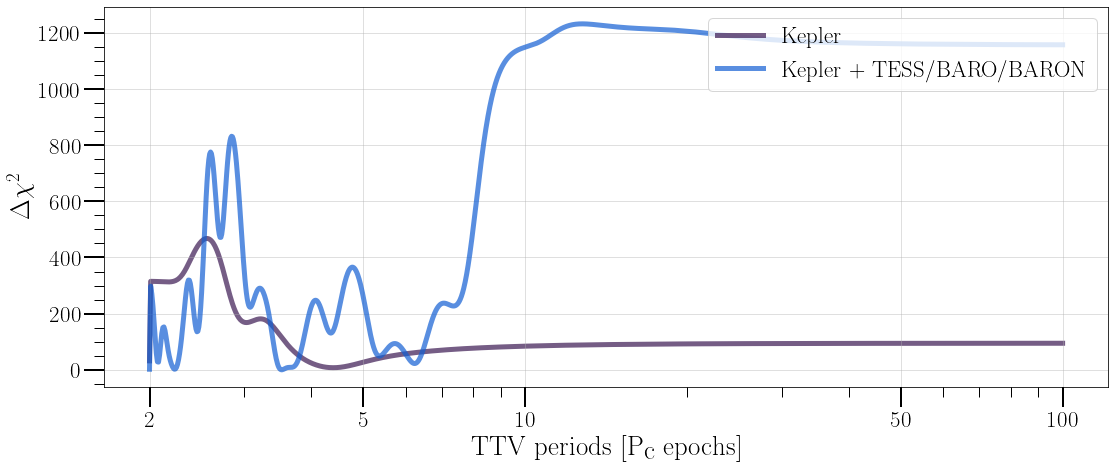

In [29]:
fig, ax = plt.subplots(1, figsize=[18, 7])


ax.plot(period_grid_kepler, chisq_grid_kepler, color="#3b1852", lw=5, label = 'Kepler', alpha=0.7, zorder=-100)
ax.plot(period_grid, chisq_grid, color="#125fd3", lw=5, label = 'Kepler + TESS/BARO/BARON', alpha=0.7)
#ax.plot(period_grid, chisq_grid2, color="#3b1852", lw=5, label = '2nd peak', alpha=0.7, zorder=-100)


ax.set_xlabel(r'TTV periods [P$_\textrm{c}$ epochs]', fontsize=27)
ax.set_ylabel(r'$\Delta \chi ^2$', fontsize=27)

ax.set_xscale('log')


ax.grid(visible=True, alpha=0.5)
ax.set_xticks([2, 5, 10, 50, 100])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())



# We change the length of ticks 
ax.tick_params('both', length=20, width=2, which='major')
ax.tick_params('both', length=10, width=1, which='minor')
ax.minorticks_on()

ax.legend(loc=1, fontsize=23)


